# . WORKFLOW STAGES
 1) Question or problem definition.
 
 2) Acquire training and testing data.
 
 3) Wrangle, prepare, cleanse the data.
 

 4) Analyze, identify patterns, and explore the data.
 
 5) Model, predict and solve the problem.
 
 6) Visualize, report, and present the problem solving steps and final solution.
 
 7) Supply or submit the results.

# . Question and problem definition
 Knowing from a training set of samples listing passengers who survived or didn't survive the 'Titanic disaster', can our model determine based on a given test dataset not contaning the survival information, if these passengers in the test dataset survived or not.

# . IMPORT & train_df

 LogisticRegression: 로지스틱 회귀
 
 LinearSVC: Logistic Regressor와 다르게 제약 조건을 설정하는 penalty가 있음.
 
 RandomForestClassifier: 랜덤 포레스트
 
 KNeighborsClassifier: K-최근접 이웃
 
 GaussianNB: 나이브 베이즈 분류기 -> 각 특성을 개별로 취급해 파라미터를 학습하고 각 특성에서 클래스별 통계를 단순하게 취합함.
 
 Perceptron: 퍼셉트론 -> 인공신경망의 한 종류
 
 SGDClassifier: 확률적 경사하강법 알고리즘을 적용한 퍼셉트론, 로지스틱 회귀, SVM을 활용할 수 있게 해줌.
 
 DecisionTreeClassifier: 결정나무

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [63]:
train_df= pd.read_csv("data/train.csv")
test_df= pd.read_csv("data/test.csv")
combine= [train_df,test_df ] # combine을 통해 두 개의 dataset을 같이 실행.

In [3]:
train_df.columns.values 
# categorical(범주형): Survived, Sex, Embarked, Ordinal(순서수): Pclass, Continous(연속형): Age, Fare. Discrete(이산적): SibSp, Parch.

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
train_df.info()
print("-"*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Ryan, Mr. Patrick",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


## Assumtions based on data analysis

 1. 총 샘플는 891개.
 2. Survived는 0과 1로 구별됨. 약 38%가 생존함.
 3. Age, Embarked 변수는 Survived와 높은 연관성을 가짐.
 4. Family 변수를 생성해 Parch와 Sibsp를 합함.
 
assumption>
 1. 여성이 더 많이 생존했을 것이다.
 2. 어린이들이 더 많이 생존했을 것이다.
 3. 높은 등급의 승객들이 더 많이 생존했을 것이다.

# . pivoting features

In [9]:
train_df[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [10]:
train_df[['Sex','Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [11]:
train_df[['SibSp','Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [12]:
train_df[['Parch','Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


## . data analysis
 1. Pclass=1과 Survived와는 높은 상관성(>0.5)을 가짐.
 2. Sex=female일 때 생존 가능성이 74%로 매우 높음.
 3. SibSp와 Parch는 특정값에서 상관성을 가지지 않음. 

# . visualization

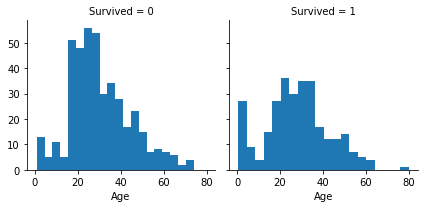

In [13]:
g= sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

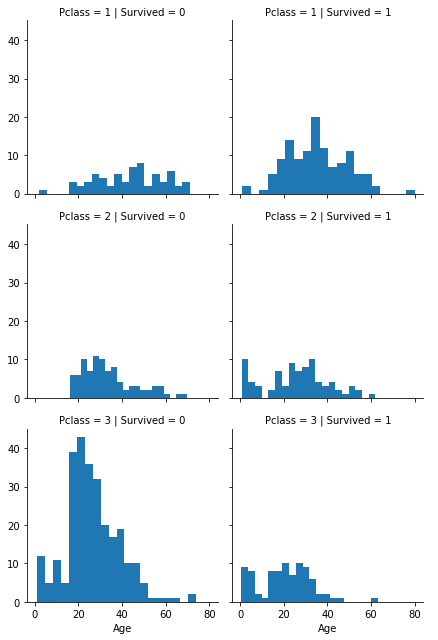

In [14]:
grid= sns.FacetGrid(train_df, col='Survived', row='Pclass')
grid.map(plt.hist, 'Age', bins=20)
grid.add_legend()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:650: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


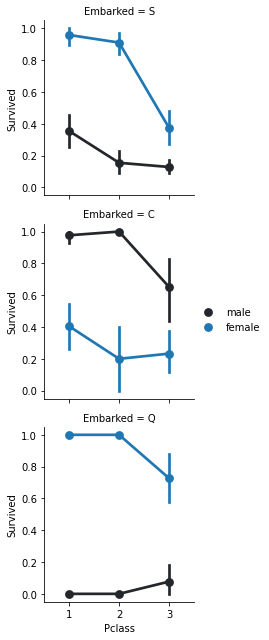

In [15]:
grid= sns.FacetGrid(train_df, row="Embarked")
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex')
grid.add_legend()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


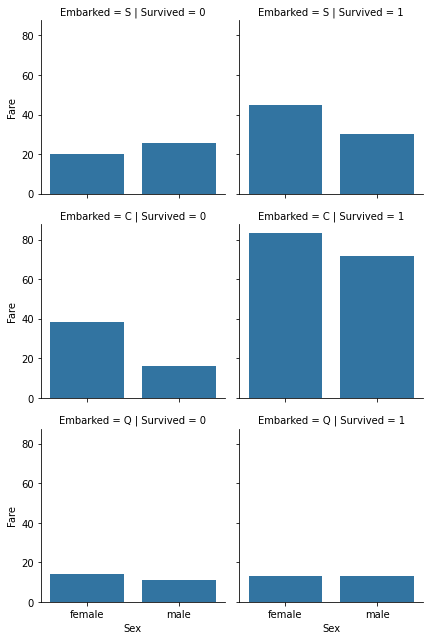

In [16]:
# correlate categorical features and numeric features.
grid= sns.FacetGrid(train_df, row='Embarked', col='Survived')
grid.map(sns.barplot, 'Sex', 'Fare',ci=None)
grid.add_legend()

## . data analysis
 1. Age<=4일 때 생존확률이 높음.
 2. 가장 나이가 많은 Age=80도 생존함.
 3. 15-25세가 가장 많이 사망함.
 4. 대부분의 탑승객은 15-35세인 것으로 확인됨.
 
 
 
 5. Pclass=3인 탑승객이 가장 많았지만 사망한 사람의 수도 가장 많음.
 6. Pclass=2 or Pclass=3인 승객 중 어린 아이들은 거의 생존함.
 7. Pclass=1인 탑승객의 생존확률이 높음.
 
 
 8. 여성일 경우 생존확률이 더 높은 것을 확인할 수 있음. 다만, Embarked=C일 때, 남성의 생존확률이 더욱 더 높음.
 
 9. 더 높은 요금을 지불한 승객일수록 생존 확률이 높음.
 10. 배에 탑승한 위치와 생존 확률 간에 상관관계가 있음.

In [64]:
# Cabin, Ticket features

print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape) #combine= [train_df,test_df ]

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine=[train_df,test_df]

print("After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

Before (891, 12) (418, 11) (891, 12) (418, 11)
After (891, 10) (418, 9) (891, 10) (418, 9)


In [65]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.',expand=False)
    
pd.crosstab(train_df['Title'],train_df['Sex'])
    

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [66]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr','Jonkheer','Major','Rev', 'Sir', 'Dona'], 'Rare')
    
    dataset['Title']= dataset['Title'].replace('Mlle','Miss')
    dataset['Title']= dataset['Title'].replace('Ms','Miss')
    dataset['Title']= dataset['Title'].replace('Mme','Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [67]:
title_mapping = {"Mr":1, "Miss":2, "Mrs":3, "Master":4, "Rare":5}

for dataset in combine:
    dataset['Title']= dataset['Title'].map(title_mapping)
    dataset['Title']= dataset['Title'].fillna(0)
    
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [68]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine=[train_df,test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

In [69]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'female':1, 'male':0}).astype(int)
    
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


## . estimating and completing features with missing or null values.

1. generate random numbers between mean and standard deviation.
2. More accurate way of guessing missing values is to use other correlated features.


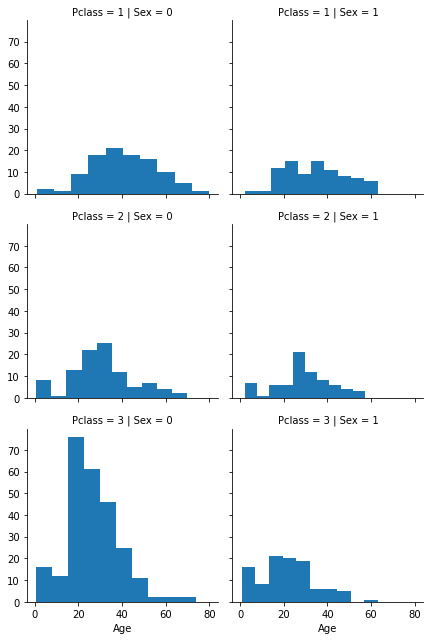

In [23]:
grid= sns.FacetGrid(train_df, row='Pclass', col='Sex')
grid.map(plt.hist, 'Age')
grid.add_legend()

In [70]:
guess_ages=np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [71]:
type(combine)
for dataset in combine:
    print(dataset)
    print(type(dataset))
print(guess_df)

     Survived  Pclass  Sex   Age  SibSp  Parch     Fare Embarked  Title
0           0       3    0  22.0      1      0   7.2500        S      1
1           1       1    1  38.0      1      0  71.2833        C      3
2           1       3    1  26.0      0      0   7.9250        S      2
3           1       1    1  35.0      1      0  53.1000        S      3
4           0       3    0  35.0      0      0   8.0500        S      1
..        ...     ...  ...   ...    ...    ...      ...      ...    ...
886         0       2    0  27.0      0      0  13.0000        S      5
887         1       1    1  19.0      0      0  30.0000        S      2
888         0       3    1   NaN      1      2  23.4500        S      2
889         1       1    0  26.0      0      0  30.0000        C      1
890         0       3    0  32.0      0      0   7.7500        Q      1

[891 rows x 9 columns]
<class 'pandas.core.frame.DataFrame'>
     PassengerId  Pclass  Sex   Age  SibSp  Parch      Fare Embarked  Titl

######

In [89]:
for dataset in combine:
    age_set=pd.DataFrame(dataset[['Age']].values)
    age_missing=np.zeros(len(age_set))
    for i in range(len(age_set)):
        if age_set[i].isnull()=="True":
            print("nan")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

########

In [57]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            age_guess = guess_df.median()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

2.0
1.0
1.0
2.0
1.0
1.0
2.0
1.0
1.0
2.0
1.0
1.0


,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6


#### 평균으로 대체한 missing value 들
도움이 안돼 도움이............어딨었더라

In [27]:
train_df['AgeBand']=pd.cut(train_df['Age'],5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'],as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [28]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [29]:
train_df=train_df.drop(['AgeBand'], axis=1)
combine=[train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


In [30]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    
train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [31]:
for dataset in combine:
    dataset['IsAlone']=0
    dataset.loc[dataset['FamilySize']==1, 'IsAlone'] = 1
    
train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [32]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


In [33]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


In [34]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [35]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [ ]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

#### 변수 추가
출발한 항구와 성별 간의 상호작용
(특정 항구에서는 남성의 생존율이 높은 것에 착안)

In [59]:
for dataset in combine:
    dataset['E*S']=dataset['Embarked']*dataset['Sex']
display(train_df.head())
display(test_df.head())

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class,E*S
0,0,3,0,1,0,0,1,0,3,0
1,1,1,1,2,3,1,3,0,2,1
2,1,3,1,1,1,0,2,1,3,0
3,1,1,1,2,3,0,3,0,2,0
4,0,3,0,2,1,0,1,1,6,0


,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class,E*S
0,892,3,0,2,0,2,1,1,6,0
1,893,3,1,2,0,0,3,0,6,0
2,894,2,0,3,1,2,1,1,6,0
3,895,3,0,1,1,0,1,1,3,0
4,896,3,1,1,1,0,3,0,3,0


In [37]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


In [38]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [39]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


In [40]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3
5,897,3,0,0,1,0,1,1,0
6,898,3,1,1,0,2,2,1,3
7,899,2,0,1,2,0,1,0,2
8,900,3,1,1,0,1,3,1,3
9,901,3,0,1,2,0,1,0,3


# . Model, predict and solve

- our problem is a classification and regression problem.
- 로지스틱 회귀는 categorical 종속변수와 1개 이상 독립변수 사이의 관계를 측정하는데 사용됨.

## . Logistic Regression

In [60]:

X_train=train_df.drop('Survived',axis=1)
Y_train=train_df['Survived']
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 9), (891,), (418, 9))

In [61]:
logreg=LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred=logreg.predict(X_test)
acc_log= round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

81.03

In [62]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.021396
8,E*S,0.471829
5,Title,0.400710
2,Age,0.276266
6,IsAlone,0.102276
4,Embarked,0.029442
3,Fare,-0.074206
7,Age*Class,-0.300135
0,Pclass,-0.757880


## . data analysis
 1. Sex 변수는 양의 값을 가짐. 이는 Sex 값이 커질수록 Survived=1이 될 가능성이 커진다는 것을 의미. (여자가 생존확률이 높음.)
 2. 하지만, Pclass는 커질수록, Survived=1은 작아지고 있음. (좌석의 등급이 낮을수록 생존확률은 낮아짐.)
 3. Age*Class 의 경우, Survived 변수와 두 번째로 큰 negative 관계를 가짐.
 4. Title의 경우 두 번째로 큰 positive 관계를 가짐.

## . Support Vector Machines

 -  패턴 인식, 자료 분석을 위한 지도 학습 모델이며, 주로 분류와 회귀 분석을 위해 사용한다. 두 카테고리 중 어느 하나에 속한 데이터의 집합이 주어졌을 때, SVM 알고리즘은 주어진 데이터 집합을 바탕으로 하여 새로운 데이터가 어느 카테고리에 속할지 판단하는 비확률적 이진 선형 분류 모델을 만든다. (출처: 위키백과, 서포트 백신 머신)

In [44]:
svc= SVC()
svc.fit(X_train, Y_train)
Y_pred=svc.predict(X_test)
acc_svc= round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

78.23

## .  k-Nearest Neighbors algorithm 

 -  분류나 회귀에 사용되는 비모수 방식이다. 두 경우 모두 입력이 특징 공간 내 k개의 가장 가까운 훈련 데이터로 구성되어 있다. 
 -  KNN은 Logistics Regression 보다 더 나은 score를 가지지만 SVM보다는 아님.

In [45]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.74

## . Gaussian Naive Bayes

 - 특성들 사이의 독립을 가정하는 베이즈 정리를 적용한 확률 분류기의 일종.

In [46]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

72.28

## . perceptron
 - 인공 신경망과 다양한 알고리즘을 통해 구현됨.

In [47]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

78.34

## . Linear SVC, Stochastic Gradient Descent

In [48]:
# Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


79.12

In [49]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

72.95

## . Decision Tree
 - 결정 트리 학습법은 어떤 항목에 대한 관측값과 목표값을 연결시켜주는 예측 모델로써 결정 트리를 사용한다.

In [50]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

86.76

## . Random Forest
 - 기계 학습에서의 랜덤 포레스트는 분류, 회귀 분석 등에 사용되는 앙상블 학습 방법의 일종으로, 훈련 과정에서 구성한 다수의 결정 트리로부터 부류 또는 평균 예측치를 출력함으로써 동작한다.

In [51]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.76

## . Model Evaluation

In [52]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})

models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,86.76
8,Decision Tree,86.76
1,KNN,84.74
2,Logistic Regression,80.36
7,Linear SVC,79.12
5,Perceptron,78.34
0,Support Vector Machines,78.23
6,Stochastic Gradient Decent,72.95
4,Naive Bayes,72.28


In [53]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })